In [49]:
from linguaf import descriptive_statistics as ds
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import wordtree

plt.rcParams["figure.figsize"] = [16,9]

ds.STOPWORDS['ru'] += ['сколько', "какие", "почему", "это", "привет"]

In [45]:
human = pd.read_csv("../data/covid-rus-dataset - human.csv")
human.message_date = pd.to_datetime(human.message_date)

chatbot = pd.read_csv("../data/covid-rus-dataset - chatbot.csv")
chatbot.date = pd.to_datetime(chatbot.date)

human = human[(~human.question.isna()) & (human.question.str.len() > 2)]
chatbot = chatbot[(~chatbot.question.isna()) & (chatbot.question.str.len() > 2)]

human.question = human.question.astype(str)
chatbot.question = chatbot.question.astype(str)

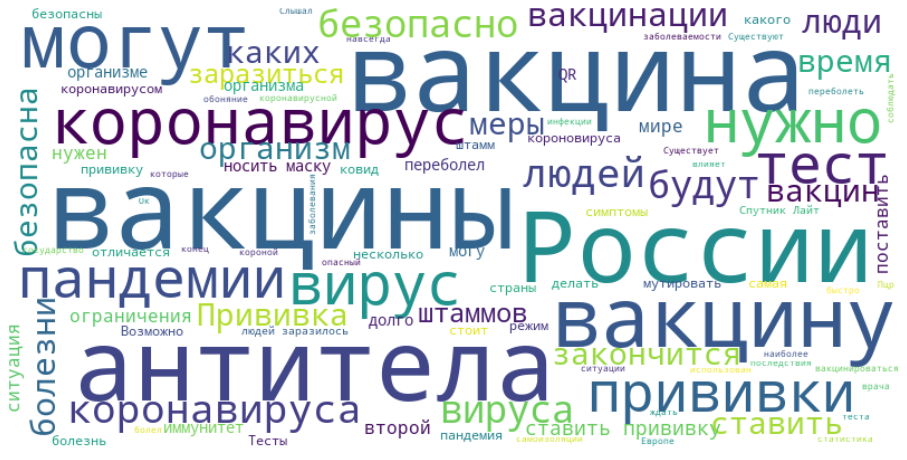

In [50]:
wordcloud = WordCloud(
    scale=2,
    max_font_size=50,
    max_words=100,
    background_color="white"
).generate(
    ' '.join(str(w) for w in ds.get_words(human.question.values.tolist(), 'ru', True))
)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

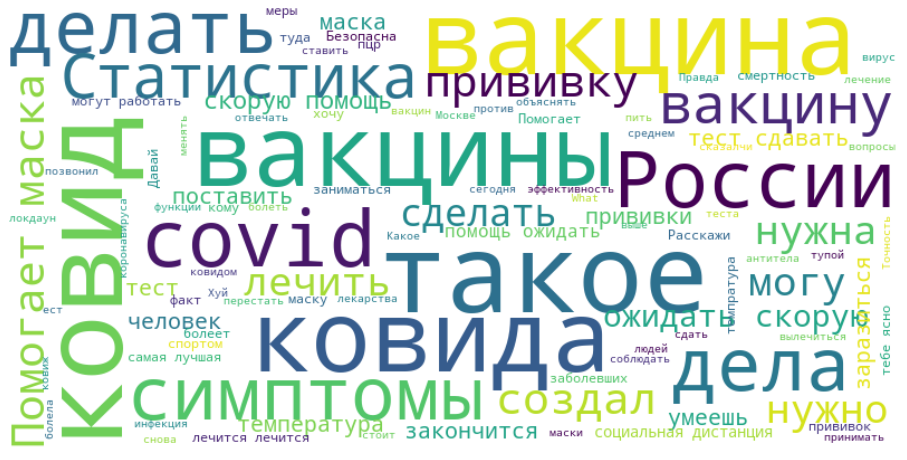

In [51]:
wordcloud = WordCloud(
    scale=2,
    max_font_size=50,
    max_words=100,
    background_color="white"
).generate(
    ' '.join(str(w) for w in ds.get_words(chatbot.question.values.tolist(), 'ru', True))
)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
q_words = ['как', 'какие', 'когда', 'сколько']

for word in q_words:
    g = wordtree.search_and_draw(corpus=[q[q.index(word):] for q in chatbot.question.values.tolist() if word in q], keyword=word, max_n=25)
    g.render()

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [54]:
"hello".index("zz")

ValueError: substring not found